In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Load from google drive
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/data/cs7641/train_tokenized.csv"
X_embeddings_path = "/content/drive/MyDrive/data/cs7641/X_embeddings.pq"

# # Load from local
# data_path = "../../data/train_tokenized.csv"
# X_embeddings_path = "../../data/X_embeddings.pq"

In [3]:
data = pd.read_csv(data_path) # Palash's file
data.drop(columns=["Unnamed: 0"], inplace=True)
data["full_text"] = data["full_text"].apply(lambda x: x.strip())
tasks = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]
data["holistic_score"] = data[tasks].mean(axis=1)
data

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_token_nltk,sent_token,word_token_manual,clean_text,lemm_text,freq_dist,most_common_words,distinct_words_cnt,holistic_score
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,"['I', 'think', 'that', 'students', 'would', 'b...",['I think that students would benefit from lea...,"['I', 'think', 'that', 'students', 'would', 'b...","['think', 'students', 'would', 'benefit', 'lea...","['think', 'student', 'would', 'benefit', 'lear...",<FreqDist with 81 samples and 129 outcomes>,"[('student', 5), ('class', 5), ('go', 5)]",81,3.333333
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,"['When', 'a', 'problem', 'is', 'a', 'change', ...",['When a problem is a change you have to let i...,"['When', 'a', 'problem', 'is', 'a', 'change', ...","['problem', 'change', 'let', 'best', 'matter',...","['problem', 'change', 'let', 'best', 'matter',...",<FreqDist with 80 samples and 215 outcomes>,"[('change', 16), ('different', 12), ('problem'...",80,2.416667
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,"['Dear', ',', 'Principal', 'If', 'u', 'change'...","['Dear, Principal\n\nIf u change the school po...","['Dear,', 'Principal\n\nIf', 'u', 'change', 't...","['dear', 'principal', 'u', 'change', 'school',...","['dear', 'principal', 'u', 'change', 'school',...",<FreqDist with 58 samples and 133 outcomes>,"[('school', 9), ('average', 9), ('sport', 8)]",58,3.000000
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,"['The', 'best', 'time', 'in', 'life', 'is', 'w...",['The best time in life is when you become you...,"['The', 'best', 'time', 'in', 'life', 'is', 'w...","['best', 'time', 'life', 'become', 'agree', 'g...","['best', 'time', 'life', 'become', 'agree', 'g...",<FreqDist with 132 samples and 282 outcomes>,"[('make', 16), ('choice', 10), ('others', 8)]",132,4.500000
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,"['Small', 'act', 'of', 'kindness', 'can', 'imp...",['Small act of kindness can impact in other pe...,"['Small', 'act', 'of', 'kindness', 'can', 'imp...","['small', 'act', 'kindness', 'impact', 'people...","['small', 'act', 'kindness', 'impact', 'people...",<FreqDist with 67 samples and 112 outcomes>,"[('people', 6), ('person', 6), ('act', 5)]",67,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,"['I', 'believe', 'using', 'cellphones', 'in', ...",['I believe using cellphones in class for educ...,"['I', 'believe', 'using', 'cellphones', 'in', ...","['believe', 'using', 'cellphones', 'class', 'e...","['believe', 'using', 'cellphone', 'class', 'ed...",<FreqDist with 66 samples and 94 outcomes>,"[('believe', 5), ('cellphone', 5), ('could', 5)]",66,2.833333
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,"['Working', 'alone', ',', 'students', 'do', 'n...","['Working alone, students do not have to argue...","['Working', 'alone,', 'students', 'do', 'not',...","['working', 'alone', 'students', 'argue', 'dec...","['working', 'alone', 'student', 'argue', 'deci...",<FreqDist with 109 samples and 212 outcomes>,"[('student', 20), ('work', 11), ('group', 11)]",109,3.750000
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,"['``', 'A', 'problem', 'is', 'a', 'chance', 'f...","['""A problem is a chance for you to do your be...","['""A', 'problem', 'is', 'a', 'chance', 'for', ...","['problem', 'chance', 'best', 'think', 'quote'...","['problem', 'chance', 'best', 'think', 'quote'...",<FreqDist with 67 samples and 106 outcomes>,"[('problem', 7), ('best', 5), ('every', 4)]",67,3.000000
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,

In [4]:
X_embeddings = pd.read_parquet(X_embeddings_path)
X_embeddings

,text_id,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,0016926B079C,0.050787,-0.020648,0.046628,0.042738,0.010770,-0.037634,-0.001906,-0.021209,-0.022767,...,-0.038458,-0.057285,-0.002004,0.036406,-0.018272,0.030892,0.050103,-0.033715,0.018629,-0.060039
1,0022683E9EA5,0.029399,0.019760,0.072005,0.067443,0.005946,-0.013700,-0.038997,0.015194,-0.002528,...,-0.041425,-0.012021,-0.030850,0.041491,0.016504,-0.009652,0.030991,-0.060080,0.021158,-0.001554
2,00299B378633,0.021062,-0.020934,-0.001454,0.054375,-0.002969,0.022928,-0.031273,0.065228,0.025898,...,-0.011179,-0.035725,-0.015828,0.026449,0.006725,-0.009515,0.063799,-0.014380,-0.005107,-0.016256
3,003885A45F42,-0.013444,0.030325,0.047811,0.081301,0.047056,0.012837,-0.009278,0.000785,0.037260,...,-0.018105,0.029301,-0.034215,0.056612,0.049250,0.027044,0.010883,0.046270,-0.001465,0.036511
4,0049B1DF5CCC,-0.009791,0.016098,0.013357,0.009807,0.077639,0.015961,-0.039515,-0.029869,0.000381,...,0.020509,-0.037942,-0.019292,-0.008364,-0.004770,-0.014046,0.062778,0.032312,-0.006859,0.019037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,0.007470,0.035424,-0.016566,-0.001752,-0.033487,-0.029245,-0.003888,-0.034789,0.047848,...,0.027962,-0.066315,-0.004833,0.017826,0.060797,0.019530,0.057516,0.019064,0.008649,-0.014842
3907,FFD9A83B0849,0.015195,0.018013,-0.002546,0.015023,-0.007959,-0.026204,-0.008703,-0.001500,0.011553,...,0.015091,-0.086855,-0.000405,0.036031,-0.010147,0.093431,-0.044508,0.073239,0.018504,-0.018605
3908,FFDC4011AC9C,-0.015208,-0.028963,0.040175,-0.005345,0.070528,0.024906,-0.003196,-0.007841,-0.005557,...,-0.020075,-0.010158,-0.070796,0.040876,0.020430,-0.013329,-0.080693,0.006435,0.005327,0.036601
3909,FFE16D704B16,0.017114,0.020061,0.001643,-0.011983,0.011232,0.031672,0.013890,-0.040182,0.012011,...,0.009817,-0.032730,0.027628,0.023874,-0.033760,0.010914,0.083385,0.005046,-0.057453,0.038138


In [5]:
from utils_trans import mcrmse, mcrmse_error, mcrmse_scorer
from simple_models import SimpleGrader

/Users/kientran/miniconda3/envs/cs7641project/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
y = data[tasks].values
X = X_embeddings.drop(columns=["text_id"]).values

In [7]:
# Create cross validation set
from sklearn.model_selection import cross_validate
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold, train_test_split

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

class XGBRegressorEarlyStopping(XGBRegressor):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
    
    def fit(self, X, y):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
        eval_set = [(X_val, y_val)]
        super().fit(X_train, y_train, eval_set=eval_set, verbose=True)

experiments = {
    "LinearRegression": {
        "decoder_cls": LinearRegression,
        "decoder_kwargs": {}
    },
    "RandomForest300_10_7_3_sqrt": {
        "decoder_cls": RandomForestRegressor,
        "decoder_kwargs": {
            "n_estimators": 300,
            "max_depth": 10,
            "min_samples_split": 7,
            "min_samples_leaf": 3,
            "max_features": "sqrt"
        }
    },
    "RandomForest300_20_7_3_0.2": {
        "decoder_cls": RandomForestRegressor,
        "decoder_kwargs": {
            "n_estimators": 300,
            "max_depth": 20,
            "min_samples_split": 7,
            "min_samples_leaf": 3,
            "max_features": 0.2
        }
    },
    "RandomForest300_10_11_5_sqrt": {
        "decoder_cls": RandomForestRegressor,
        "decoder_kwargs": {
            "n_estimators": 300,
            "max_depth": 10,
            "min_samples_split": 11,
            "min_samples_leaf": 5,
            "max_features": "sqrt"
        }
    },
    "RandomForest300_10_3_1_0.1": {
        "decoder_cls": RandomForestRegressor,
        "decoder_kwargs": {
            "n_estimators": 300,
            "max_depth": 10,
            "min_samples_split": 3,
            "min_samples_leaf": 1,
            "max_features": 0.1
        }
    },
    "XGBRegressor": {
        "decoder_cls": XGBRegressorEarlyStopping,
        "decoder_kwargs": {
            "n_estimators": 500,
            "eval_metric":mean_squared_error, 
            "early_stopping_rounds":10,
            "objective": "reg:squarederror",
            }
    }
}

In [9]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_iterators = skf.split(X=X, y=y.mean(axis=1).astype(int))

In [11]:
experiment_results = {}
for experiment_name, experiment in experiments.items():
    print(f"Running experiment: {experiment_name}")
    model = SimpleGrader(experiment["decoder_cls"], experiment["decoder_kwargs"])
    scores = cross_validate(
        model, 
        X=X, 
        y=y, 
        cv=10,
        scoring=mcrmse_scorer,
        n_jobs=1,
        error_score='raise'
        )
    experiment_results[experiment_name] = scores
    print(f"Experiment {experiment_name} finished. Mean score: {np.mean(scores['test_score'])}")

Running experiment: LinearRegression
Experiment LinearRegression finished. Mean score: -0.5445840179520254
Running experiment: RandomForest300_10_7_3_sqrt
Experiment RandomForest300_10_7_3_sqrt finished. Mean score: -0.5533729764005458
Running experiment: RandomForest300_20_7_3_0.2
Experiment RandomForest300_20_7_3_0.2 finished. Mean score: -0.5391030435472913
Running experiment: RandomForest300_10_11_5_sqrt
Experiment RandomForest300_10_11_5_sqrt finished. Mean score: -0.5534607240987475
Running experiment: RandomForest300_10_3_1_0.1
Experiment RandomForest300_10_3_1_0.1 finished. Mean score: -0.5451986145526602
Running experiment: XGBRegressor
[0]	validation_0-rmse:1.97964	validation_0-mean_squared_error:3.91896
[1]	validation_0-rmse:1.46373	validation_0-mean_squared_error:2.14252
[2]	validation_0-rmse:1.12025	validation_0-mean_squared_error:1.25496
[3]	validation_0-rmse:0.89839	validation_0-mean_squared_error:0.80711
[4]	validation_0-rmse:0.75534	validation_0-mean_squared_error:0.57

In [12]:
experiment_results

{'LinearRegression': {'fit_time': array([2.63638997, 2.23798299, 2.32168102, 2.23810029, 2.20504713,
         2.44768691, 2.69574213, 2.53197002, 2.30777717, 2.29870796]),
  'score_time': array([0.00159788, 0.00268817, 0.00142407, 0.00263667, 0.00176573,
         0.00202012, 0.00192094, 0.00139117, 0.00174165, 0.0016892 ]),
  'test_score': array([-0.54699442, -0.54567978, -0.54836668, -0.53197986, -0.54510476,
         -0.55713769, -0.56500058, -0.5423439 , -0.53569058, -0.52754193])},
 'RandomForest300_10_7_3_sqrt': {'fit_time': array([50.19661093, 50.46677709, 50.48127794, 50.69113803, 50.3615551 ,
         50.33688593, 50.31431508, 50.17213488, 49.6017642 , 50.10273099]),
  'score_time': array([0.17625117, 0.10200286, 0.10524487, 0.10139203, 0.10176611,
         0.1005919 , 0.09947705, 0.09953094, 0.09988713, 0.10363007]),
  'test_score': array([-0.56359205, -0.53926428, -0.57878826, -0.56171098, -0.54404977,
         -0.55172259, -0.55157936, -0.53986149, -0.55766357, -0.54549742])

In [13]:
import pickle
with open("../../data/experiment_results.pickle", "wb") as f:
    pickle.dump(experiment_results, f)



In [20]:
experiment_results_df = []
for model, scores in experiment_results.items():
    df_ = pd.DataFrame(experiment_results[model])
    df_["model"] = model
    experiment_results_df.append(df_)

experiment_results_df = pd.concat(experiment_results_df, axis=0)

experiment_results_df.reset_index(inplace=True)
experiment_results_df.rename(columns={"index": "fold"}, inplace=True)
experiment_results_df["test_score"] = - experiment_results_df["test_score"]
experiment_results_df

,fold,fit_time,score_time,test_score,model
0,0,2.636390,0.001598,0.546994,LinearRegression
1,1,2.237983,0.002688,0.545680,LinearRegression
2,2,2.321681,0.001424,0.548367,LinearRegression
3,3,2.238100,0.002637,0.531980,LinearRegression
4,4,2.205047,0.001766,0.545105,LinearRegression
5,5,2.447687,0.002020,0.557138,LinearRegression
6,6,2.695742,0.001921,0.565001,LinearRegression
7,7,2.531970,0.001391,0.542344,LinearRegression
8,8,2.307777,0.001742,0.535691,LinearRegression
9,9,2.298708,0.001689,0.527542,LinearRegression


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

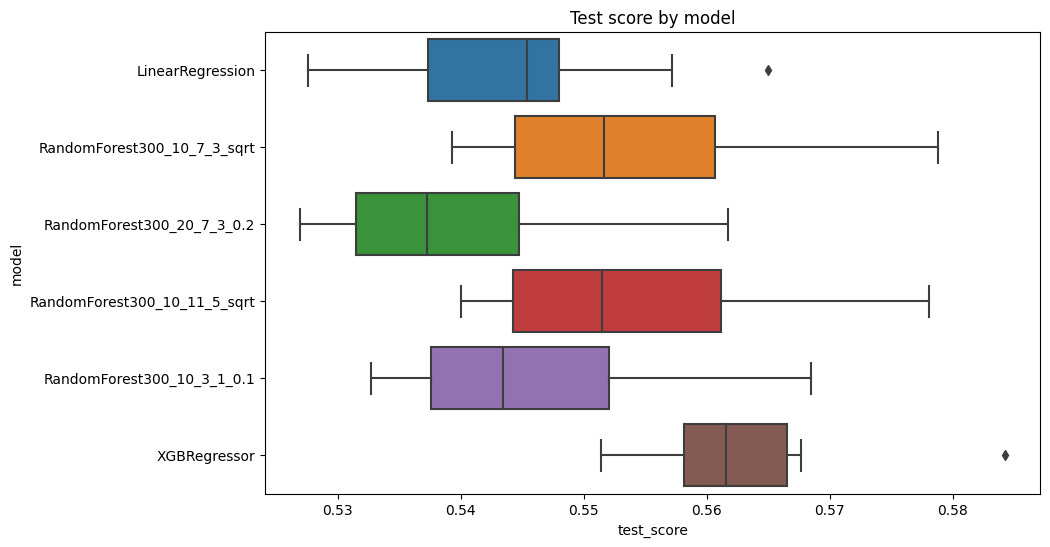

In [25]:
# Plot experiment results: test_score by model, using seaborn horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="test_score", y="model", data=experiment_results_df, orient="h")
plt.title("Test score by model")
plt.show()
